# Deep Learning avec Keras

En guise d'initiation au Deep Learning, nous allons utiliser la bibliothèque Python [Keras](https://keras.io), basée sur [Tensorflow](https://www.tensorflow.org/).

## Objectifs

Cette activité va nous permettre de :

- Utiliser l'apprentissage profond pour des problèmes de vision par ordinateur
- Utiliser des modèles pré-entrainés
- Construire des modèles avec une approche par couche
- Manipuler le bibliothèque Keras (et par extension Tensorflow)

## Installation

**2 options** pour effectuer cette activité :

- Utiliser votre machine locale : si vous n'avez pas un GPU NVidia, les phases d'entrainement seront très longues
- Utiliser [Google Colab](https://colab.research.google.com/) avec option GPU : permet d'accélerer les phases d'entrainement

D'ordre général, Keras étant désormais inclus avec Tensorflow, il suffit simplement d'installer la bibliothèque `tensorflow` :

```bash
pip install tensorflow
```

Si vous utilisez `pipenv`, un `Pipfile` avec les dépendances nécessaires est inclus dans ce dépôt. Si vous utilisez Colab, `tensorflow` est déjà installé.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
from tensorflow import keras

set_matplotlib_formats("svg")

## Partie 1 : modèle pré-entrainé

La liste des modèles pré-entrainés et inclus avec Keras est dans la section [Applications](https://keras.io/api/applications/).
Les modèles pré-entrainés sont prêt à effectuer des prédictions : **vous n'avez pas besoin d'effectuer une phase d'entrainement !**

Pour commencer en douceur, nous allons expérimenter avec un modèle pré-entrainé à classifier des images du jeu de données [ImageNet](https://en.wikipedia.org/wiki/ImageNet) : [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function).
Comme son nom l'indique, c'est un réseau de neurones convolutif (_CNN_) à 50 couches. Voici un schéma de son architecture :

![ResNet50 Schema](https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png)

Objectif de cette partie :

1. Charger le modèle CNN ResNet50 avec Keras
2. Charger une photographie de votre choix au format `.jpg`, par exemple une voiture, une maison, un enfant, un instrument de musique, etc.
3. Effectuer le pré-traitement d'image requis par le modèle (bien lire la documentation du modèle ResNet50)
4. Effectuer la prédiction avec ResNet50
5. Tenter d'autres prédictions avec d'autres images



In [2]:
# YOUR CODE HERE

# Source: https://keras.io/api/applications/#usage-examples-for-image-classification-models

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

model = ResNet50(weights="imagenet")

img_path = "guitar.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Predicted (class id, class name, probability):", decode_predictions(preds, top=3)[0])

Predicted (class id, class name, probability): [('n03272010', 'electric_guitar', 0.98561436), ('n02676566', 'acoustic_guitar', 0.011093668), ('n02787622', 'banjo', 0.001387201)]


## Partie 2 : Perceptron multi-couche

Nous allons commencer à construire notre premier réseau de neurones avec Keras. Nous allons utiliser la topologie de Perceptron multi-couche que vous connaissez déjà en utilisant un modèle [_Sequential_](https://keras.io/guides/sequential_model/), les couches [_Flatten_](https://keras.io/api/layers/reshaping_layers/flatten/) et [_Dense_](https://keras.io/api/layers/core_layers/dense/) de Keras.

Voici l'architecture MLP que nous allons mettre en place (l'ordre des couches est à respecter) :

- Une couche d'entrée d'applatissement (flattening) pour transformer une image 28 x 28 en un vecteur unidimensionnel de 784 features
- Une couche cachée dense de 300 neurones avec fonction d'activation ReLU
- Une couche cachée dense de 100 neurones avec fonction d'activation ReLU
- Une couche de sortie dense de 10 neurones avec fonction d'activation SoftMax

En utilisant le jeu de données [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) inclus dans Keras :

1. Charger le jeu de données et normaliser les images 8-bit entre 0 et 1
2. Observer un exemplaire d'image de chaque classe
3. Construire le réseau de neurone MLP à 4 couches décrit ci-dessus
4. Afficher un résumé du modèle et observer les nombres de paramètres
5. Compiler le modèle
6. Entrainer le modèle sur 30 epochs avec 10% de cross-validation
7. Afficher les courbes d'apprentissage à partir de l'historique de la phase d'apprentissage pour vérifier le risque de sur-apprentissage
8. Evaluer le modèle sur le jeu de test
9. Effectuer quelques prédictions et vérifier les résultats en affichant les images

Etant donné la complexité introduite, la squelette du code vous est fourni, il suffit de compléter les ellipses `...` par l'utilisation de Keras en se référant à la documentation.

X_train_full (60000, 28, 28)
X_test (10000, 28, 28)
y_test (10000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.7300 - sparse_categorical_accuracy: 

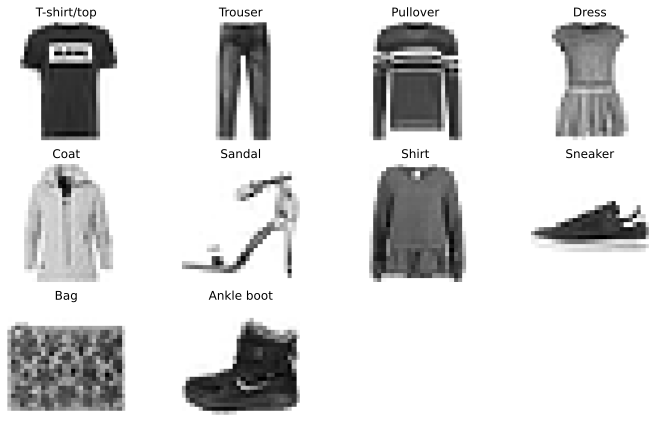

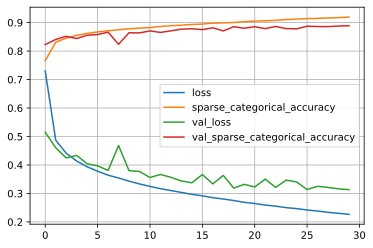

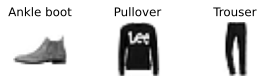

In [3]:
# Charger le jeu de données Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("X_train_full", X_train_full.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

# Normaliser les images 8-bit entre 0 et 1
X_train = X_train_full / 255.0
X_test = X_test / 255.0

# Afficher un exemple d'image pour chaque classe
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

plt.figure(figsize=(12, 10))
for i in range(len(class_names)):
    idx = np.where(y_train_full == i)[0][0]
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[idx,:,:], cmap="binary")
    plt.title(class_names[i])
    plt.axis("off")

# Construire le réseau de neurone MLP à 4 couches
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax),
])

# Afficher un résumé du modèle et observer les nombres de paramètres
mlp_model.summary()

# Compiler le modèle
mlp_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy],
)

# Entrainer le modèle
history = mlp_model.fit(X_train, y_train_full, epochs=30, validation_split=0.1)

# Afficher les courbes d'apprentissage à partir de l'historique de la phase d'apprentissage
pd.DataFrame(history.history).plot()
plt.grid(True)

# Evaluer le modèle sur le jeu de test
evaluation = mlp_model.evaluate(X_test, y_test)
print(evaluation)

# Effectuer quelques prédictions
y_pred_proba = mlp_model.predict(X_test[:3])
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

# Vérifier les résultats en affichant les images
plt.figure(figsize=(5, 1))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[i,:,:], cmap="binary")
    plt.title(class_names[y_pred[i]])
    plt.axis("off")

## Partie 3 : Réseau de neurone convolutif

Passons à l'étape supérieure désormais : construisons un réseau de neurones convolutif !

En reprenant le modèle MLP précédent, nous allons l'adapter pour ajouter des couches convolutives avant les couches denses :

- 1 première couche convolutive d'entrée de 64 filtres 7 x 7 (_Conv2D_) sur des données de dimensions 28 x 28 x 1
- 1 couche de _max pooling_ de taille 2 (_MaxPooling2D_)
- 2 couches convolutives successives de 128 filtres 3 x 3
- 1 couche de _max pooling_ de taille 2
- 2 couches convolutives successives de 256 filtres 3 x 3
- 1 couche de _max pooling_ de taille 2
- 1 couche d'applatissement pour revenir à un vecteur à 1 dimension
- 1 couche dense de 128 neurones
- 1 couche de perte de données (_Dropout_)
- 1 couche dense de 64 neurones
- 1 couche de perte de données
- 1 couche dense de sortie de 10 neurones

Le code vous correspond vous est fourni, vous devez simplement l'exécuter et observer les résultats. Normalement, ce modèle est censé atteindre 92% de justesse sur les données de test.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

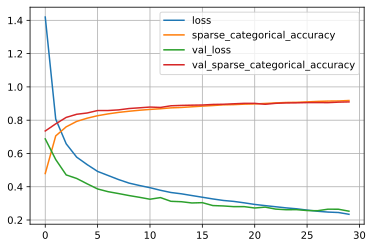

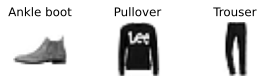

In [4]:
# Construction du modèle convolutif
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation=keras.activations.relu, padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, 3, activation=keras.activations.relu, padding="same"),
    keras.layers.Conv2D(128, 3, activation=keras.activations.relu, padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation=keras.activations.relu, padding="same"),
    keras.layers.Conv2D(256, 3, activation=keras.activations.relu, padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=keras.activations.softmax),
])

# Afficher un résumé du modèle et observer les nombres de paramètres
cnn_model.summary()

# Compiler le modèle
cnn_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy],
)

# Entrainer le modèle
history = cnn_model.fit(X_train, y_train_full, epochs=30, validation_split=0.1)

# Afficher les courbes d'apprentissage à partir de l'historique de la phase d'apprentissage
pd.DataFrame(history.history).plot()
plt.grid(True)

# Evaluer le modèle sur le jeu de test
evaluation = cnn_model.evaluate(X_test, y_test)
print(evaluation)

# Effectuer quelques prédictions
y_pred_proba = cnn_model.predict(X_test[:3])
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

# Vérifier les résultats en affichant les images
plt.figure(figsize=(5, 1))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[i,:,:], cmap="binary")
    plt.title(class_names[y_pred[i]])
    plt.axis("off")